In [1205]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

Импортируем с рабочего стола документ формата csv, изучаем название столбцов и форматы данных. 

In [1206]:
file = '/Users/iblackjesus/Desktop/synthetical_payments.csv'
db = pd.read_csv(file,delimiter=',')
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userId           38498 non-null  int64  
 1   billingCountry   38498 non-null  object 
 2   transactionTime  38498 non-null  int64  
 3   product          38498 non-null  object 
 4   price            38498 non-null  float64
 5   amount           38498 non-null  float64
 6   period           38498 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 2.1+ MB


Проверяем базу данных на пропуски 

In [1207]:
db.isna().sum()

userId             0
billingCountry     0
transactionTime    0
product            0
price              0
amount             0
period             0
dtype: int64

Приводим к общему виду название всех столбцов данных. Меняем формат данных столбцов transactionTime, product.

In [1208]:
db.rename(columns={'userId': 'user_id','billingCountry': 'billing_country','transactionTime': 'transaction_time'}, inplace=True)
db['transaction_time'] = pd.to_datetime(db['transaction_time'], unit='s')
db['product']= db['product'].astype('category')
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           38498 non-null  int64         
 1   billing_country   38498 non-null  object        
 2   transaction_time  38498 non-null  datetime64[ns]
 3   product           38498 non-null  category      
 4   price             38498 non-null  float64       
 5   amount            38498 non-null  float64       
 6   period            38498 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.8+ MB


Удаляем послендюю строку из датафрейма которая содержит 1 строку с данными за 2018 год 

In [1209]:
db.transaction_time.describe
db = db.drop(db.index[38497])

Добавляем 2 дополнительных столбца year, month, для построения послудющей визуальизации данных

In [1210]:
db['year'] = db['transaction_time'].dt.year
db['month'] = db['transaction_time'].dt.strftime('%b')

Используя библиотеку seaborn строим catplots на которых сравниваем кол-во оплаченых подписок по 3 тарифам [PRO,GURU,BUISNESS] за период с 2015-2017 год включительно. 
Из графика видно, что с каждым годом кол-во новых пользвателей сервиса увеличивалось, с 2016 года тариф GURU стал пользоватся большей популярностью и кол-во пользователей кто ежемесечно или ежегодно оплачивал этот тариф выросло с 3,6к до 15,2к

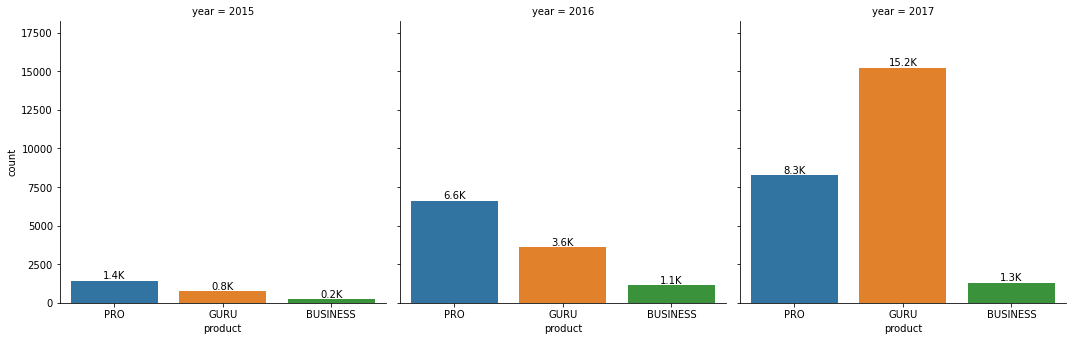

In [1261]:
tarif_order = ['PRO',
                'GURU',
                'BUSINESS']
g = sns.catplot(x='product',col='year',data=db, kind='count',order=tarif_order)
g.fig.set_size_inches(15, 5)
g.fig.subplots_adjust(top=0.9)
for ax in g.axes.ravel():
    for c in ax.containers:
        labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
plt.show()

Если сравнивать предложенные тарифами периоды оплаты: 1 месяц и 12 месяцев, из графиков видно, что тариф GURU пользуется большим спросом в этих двух категориях.

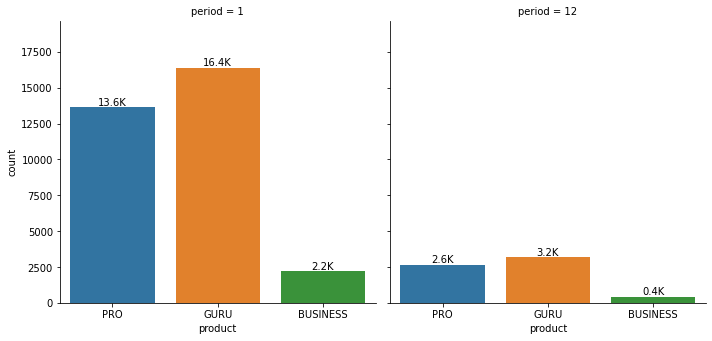

In [1262]:
tarif_order = ['PRO',
                'GURU',
                'BUSINESS']
g = sns.catplot(x='product',col='period',data=db, kind='count',order=tarif_order)
g.fig.set_size_inches(10, 5)
g.fig.subplots_adjust(top=0.9)
for ax in g.axes.ravel():
    for c in ax.containers:
        labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
plt.show()

Фильтруем базу данных по году 

In [1264]:
fifteen = db[db['transaction_time'].dt.strftime('%Y') =='2015']
sixteen = db[db['transaction_time'].dt.strftime('%Y') =='2016']
seventeen = db[db['transaction_time'].dt.strftime('%Y') =='2017']

Создаем сводные таблицы для построения графиков 


In [1265]:
fifteen_pivot = fifteen.pivot_table(index = ['billing_country'], values = ['period'],columns = 'product', aggfunc = {'period': np.size})
fifteen_df = pd.DataFrame(fifteen_pivot.to_records())
fifteen_df.set_index('billing_country', inplace=True)
fifteen_df.rename(columns={"('period', 'BUSINESS')": 'BUSINESS',"('period', 'GURU')": 'GURU',"('period', 'PRO')": 'PRO' }, inplace=True)

sixteen_pivot = sixteen.pivot_table(index = ['billing_country'], values = ['period'],columns = 'product', aggfunc = {'period': np.size})
sixteen_df = pd.DataFrame(sixteen_pivot.to_records())
sixteen_df.set_index('billing_country', inplace=True)
sixteen_df.rename(columns={"('period', 'BUSINESS')": 'BUSINESS',"('period', 'GURU')": 'GURU',"('period', 'PRO')": 'PRO' }, inplace=True)

seventeen_pivot = seventeen.pivot_table(index = ['billing_country'], values = ['period'],columns = 'product', aggfunc = {'period': np.size})
seventeen_df = pd.DataFrame(seventeen_pivot.to_records())
seventeen_df.set_index('billing_country', inplace=True)
seventeen_df.rename(columns={"('period', 'BUSINESS')": 'BUSINESS',"('period', 'GURU')": 'GURU',"('period', 'PRO')": 'PRO' }, inplace=True)



Проводим анализ по сигменту пользвателей из разных стран(стран где была совершена транзакция, пользватель не обязательно может быть гражданином той страны и проживать там потсоянно). В 2015 и 2016 году лидером покупки подписок были US UK в 2017 году лидером стала Франция. 
В 2017 году виден рост кол-ва подписок тарифа GURU 

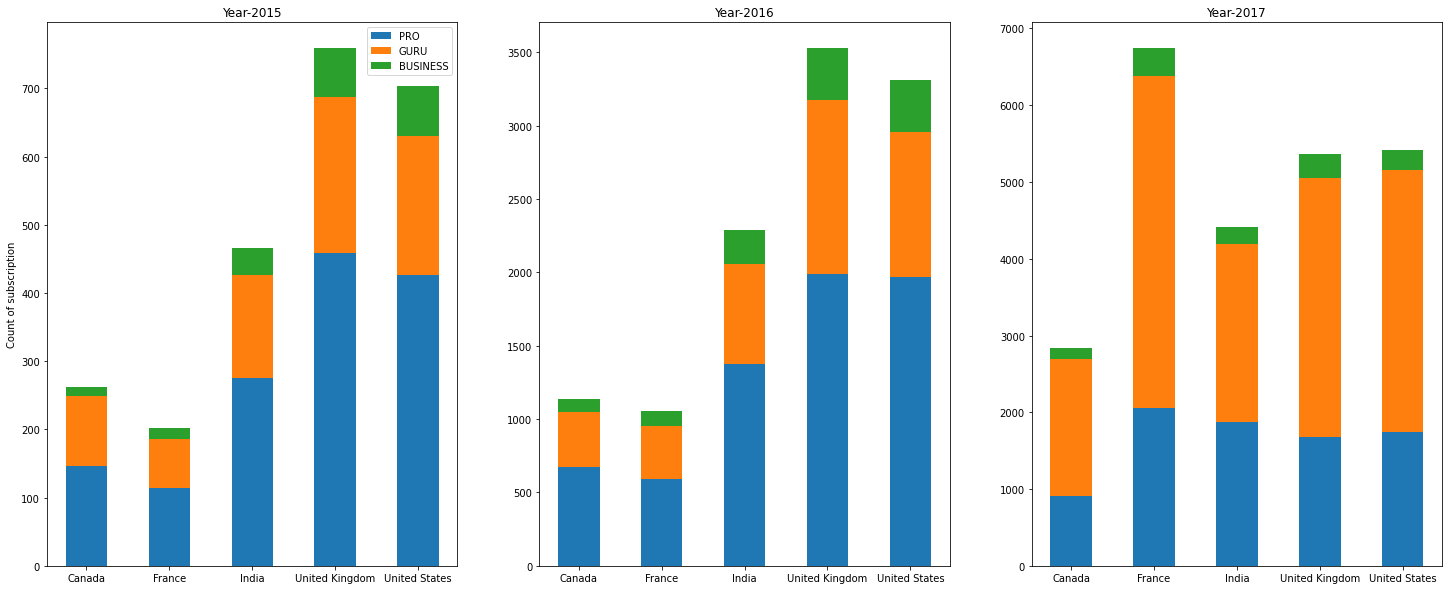

In [1412]:
fig, axs = plt.subplots(1,3,figsize=(25, 10),sharey=False)
axs[0].bar(fifteen_df.index, fifteen_df['PRO'],width=0.5,label='PRO')
axs[0].bar(fifteen_df.index, fifteen_df["GURU"], bottom=fifteen_df["PRO"],width=0.5,label='GURU')
axs[0].bar(fifteen_df.index, fifteen_df["BUSINESS"], bottom=fifteen_df["PRO"]+fifteen_df["GURU"],width=0.5,label='BUSINESS')
axs[0].set_ylabel("Count of subscription")
axs[0].set_title('Year-2015')
axs[0].legend()

axs[1].bar(sixteen_df.index, sixteen_df['PRO'],width=0.5)
axs[1].bar(sixteen_df.index, sixteen_df["GURU"], bottom=sixteen_df["PRO"],width=0.5)
axs[1].bar(sixteen_df.index, sixteen_df["BUSINESS"], bottom=sixteen_df["PRO"]+sixteen_df["GURU"],width=0.5)
axs[1].set_title('Year-2016')

axs[2].bar(seventeen_df.index, seventeen_df['PRO'],width=0.5)
axs[2].bar(seventeen_df.index, seventeen_df["GURU"], bottom=seventeen_df["PRO"],width=0.5)
axs[2].bar(seventeen_df.index, seventeen_df["BUSINESS"], bottom=seventeen_df["PRO"]+seventeen_df["GURU"],width=0.5)
axs[2].set_title('Year-2017')
plt.show()


Данный график должен был отразить динамику по периода клиентов с помесечной оплаты на погодовую по 3 разным тарифам

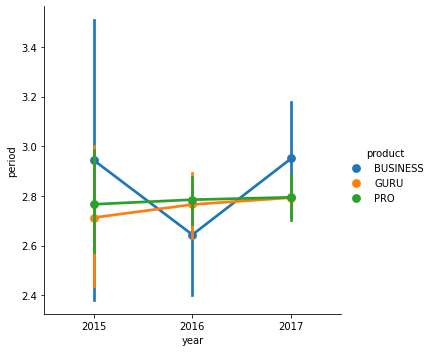

In [1413]:

sns.catplot(x="year",y="period",data=db,hue="product",kind="point")
plt.show()

In [1420]:
price_pivot =pd.pivot_table(db,index=['period','amount'],values='price',columns='product',aggfunc={'price':np.mean})
price_pivot

product          BUSINESS    GURU    PRO
period amount                           
1      49.99          NaN     NaN  99.99
       79.99          NaN     NaN  99.99
       99.99          NaN     NaN  99.99
       100.00         NaN  199.99    NaN
       159.99         NaN  199.99    NaN
       199.99         NaN  199.99    NaN
       200.00      399.99     NaN    NaN
       319.99      399.99     NaN    NaN
       399.99      399.99     NaN    NaN
       30000.00    399.99     NaN    NaN
12     503.95         NaN     NaN  99.99
       806.32         NaN     NaN  99.99
       1007.90        NaN     NaN  99.99
       1007.95        NaN  199.99    NaN
       1612.72        NaN  199.99    NaN
       2015.90        NaN  199.99    NaN
       2015.95     399.99     NaN    NaN
       3225.52     399.99     NaN    NaN
       4031.90     399.99     NaN    NaN

Общая сводная таблица которая показывает сумму обортных средств которе заработала компания в период с 2015-2017 год, сигментированная тарифами и сроками оплаты. Исходя из этих данных можем сказать, что 2017 год стал самым прибыльным для компании, больше всего оборота принес тариф гуру с погодовой оплатой 4908729.60. Пользователи чаще пользуются тарифом Гуру и оплачивают его на 12 месяцев. По динамике новых пользвателей Канада занимает последнее место. 

In [1421]:
pv = pd.pivot_table(db,index=['product','year','period'],values='amount',columns='month',aggfunc={'amount':np.sum})
pv = pd.DataFrame(pv.to_records())
pv.set_index('product', inplace=True)
pv = pv[pv.columns[[0,1,6,5,9,3,10,8,7,3,13,12,11,4]]]
pv.loc[:,'Row_Total'] = pv.sum(numeric_only=True, axis=1)

pv

,year,period,Jan,Feb,Mar,Aug,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Row_Total
product,,,,,,,,,,,,,,,
BUSINESS,2015,1,399.99,799.98,2719.93,8199.80,4199.90,3999.91,6119.85,8199.80,9319.78,8719.79,10519.74,9639.76,74854.23
BUSINESS,2015,12,8063.80,8063.80,4031.90,12095.70,12095.70,12095.70,12095.70,12095.70,12095.70,6047.85,24191.40,22578.64,147578.59
BUSINESS,2016,1,17159.57,18839.53,21639.47,34119.15,26039.37,28279.30,31999.21,34119.15,36839.08,38759.03,52678.69,71038.99,413527.54
BUSINESS,2016,12,30239.25,44350.90,28223.30,66929.54,40319.00,37496.67,52414.70,66929.54,91120.94,67735.92,114909.15,51608.32,694305.23
BUSINESS,2017,1,33559.18,32879.19,32959.19,40159.01,32119.21,29879.25,37319.07,40159.01,43198.93,42198.96,30559.24,53919.40,450927.64
BUSINESS,2017,12,32255.20,36287.10,76606.10,83057.14,85073.09,83863.52,64510.40,83057.14,99991.12,95959.22,133052.70,50398.75,926140.48
GURU,2015,1,199.99,2359.88,3259.85,10419.49,8179.59,8419.58,7059.65,10419.49,15439.23,19939.02,22158.91,19859.05,129729.73
GURU,2015,12,6047.70,4031.80,8063.60,22376.49,17739.92,18143.10,13909.71,22376.49,18747.87,40318.00,21771.72,37898.92,233452.32
GURU,2016,1,23438.84,32618.38,34918.26,53797.35,38858.09,43517.85,44177.80,53797.35,58157.14,66836.73,73876.37,76136.26,602147.42


Озвучу свои небольщие предположения и гипотезы (которые не будут подкреплены какими-то цифрами) о развитии компании и увеличение ее оборотов, а так же наблюдения которые и язвлек из анализа данных. 

Если разделить тарифы на уровни лояльности клиентов получается, что у компании на 2017 год преобладающее кол-во пользователей находятся в области "лояльные":'Guru', которые предочитают оплачивать тарфик каждый месяц. Для увеличения конверсии перехода этой группы клиентов на уровнь выше можно сделать следующее: Увеличить стоимость тарифа GURU при оплате на месяци и уменьшить стомость тарифа BUISNESS при оплате на месяц. Тогда разница  в оплате на месяц  между этими тарифами будет составлять 600 рублей. Как мы видем из графиков, преобладющей является месячная оплата любого из тарифов. 
